In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [73]:
X, y = make_classification (n_samples=10000, n_features=8, n_informative=5, class_sep=2, random_state=42)
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770


In [74]:
df.duplicated().sum()

0

In [31]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

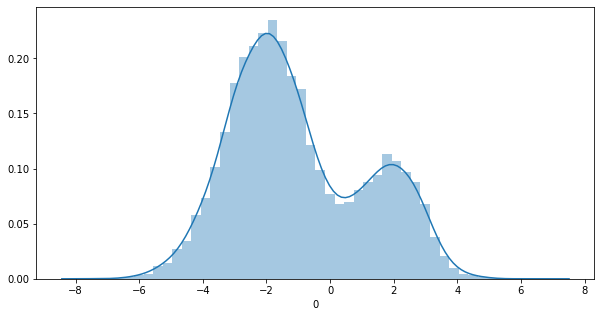

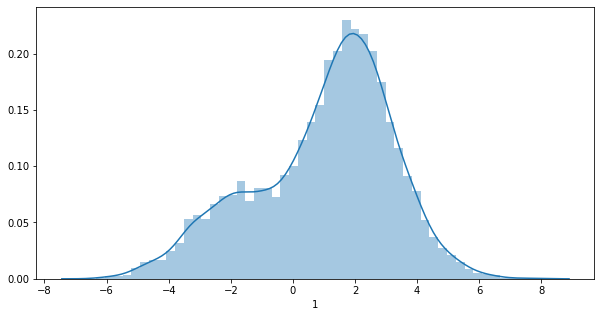

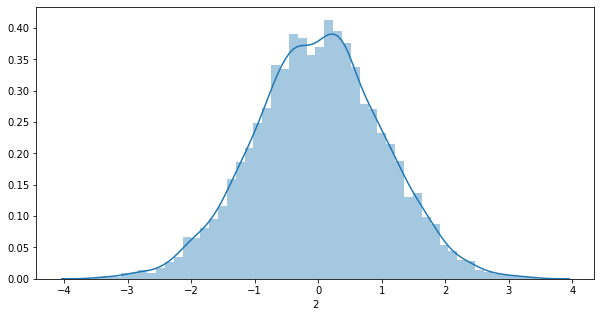

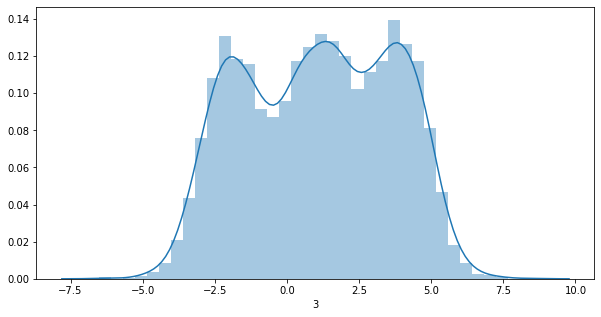

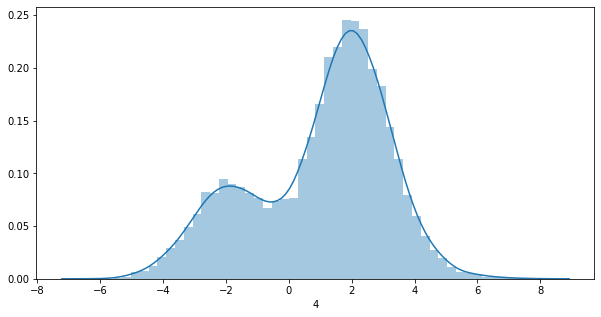

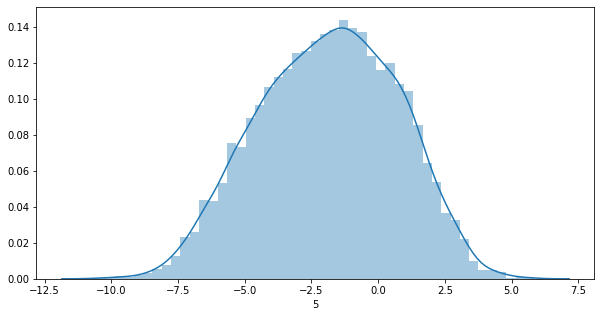

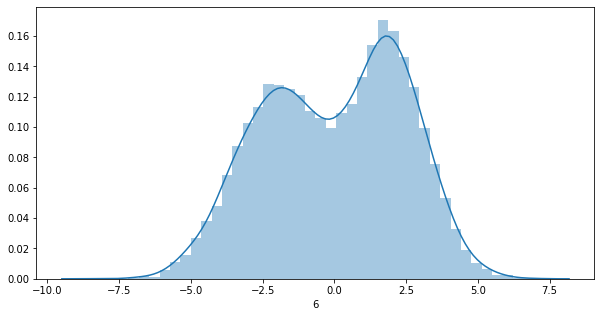

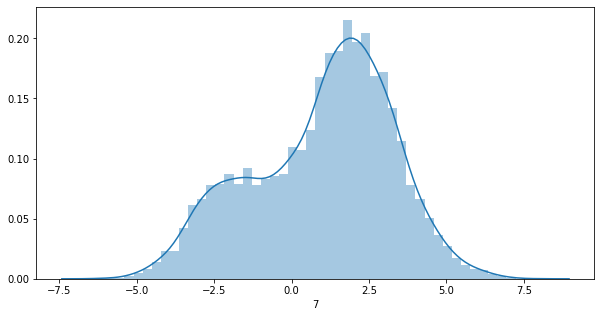

In [53]:
for i in range (8):
    plt.figure(figsize=(10, 5))
    sns.distplot(df[i])

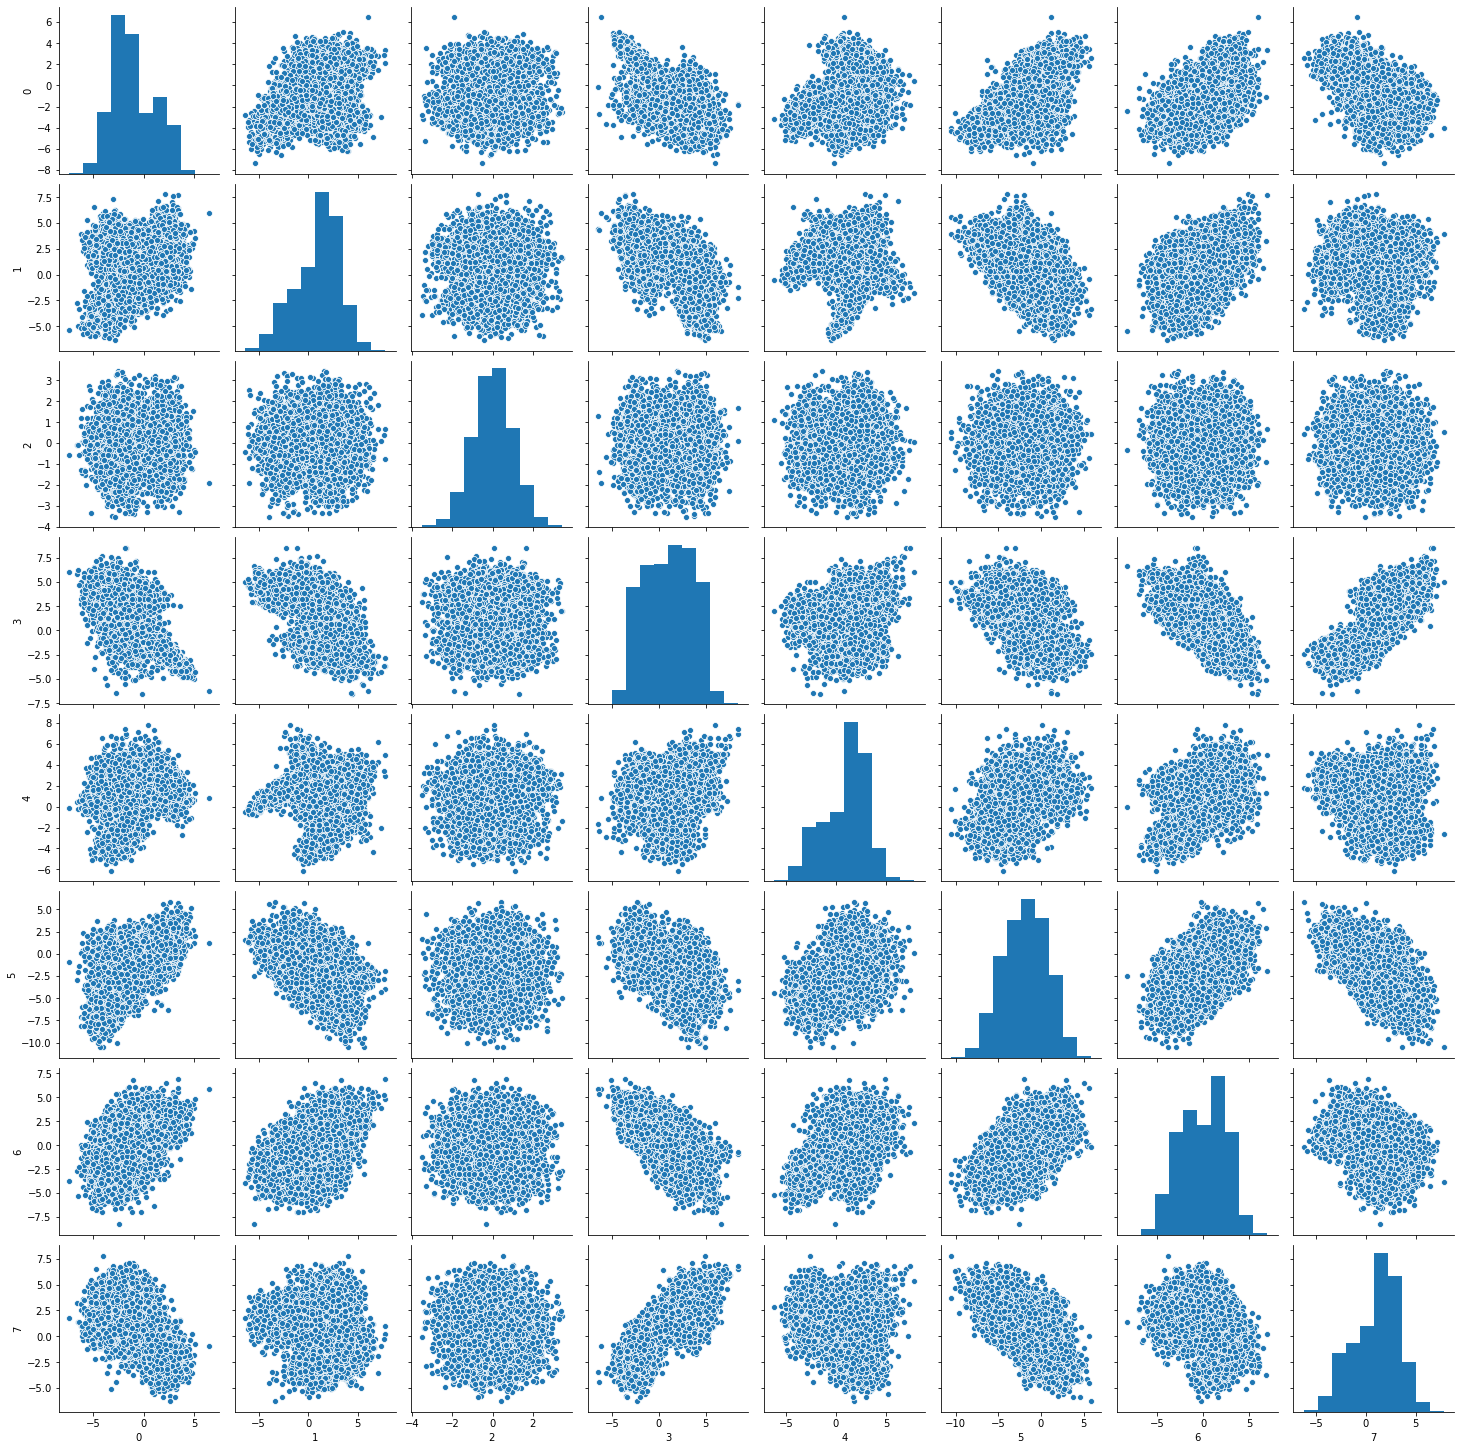

In [48]:
sns.pairplot(df)

In [54]:
df.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540
1,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568
2,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107
3,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458
4,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576
5,0.635628,-0.347091,0.023192,-0.439463,0.461343,1.000000,0.547131,-0.647011
6,0.545522,0.469165,0.020194,-0.672497,0.465025,0.547131,1.000000,-0.388518
7,-0.636540,-0.129568,-0.018107,0.758458,-0.176576,-0.647011,-0.388518,1.000000


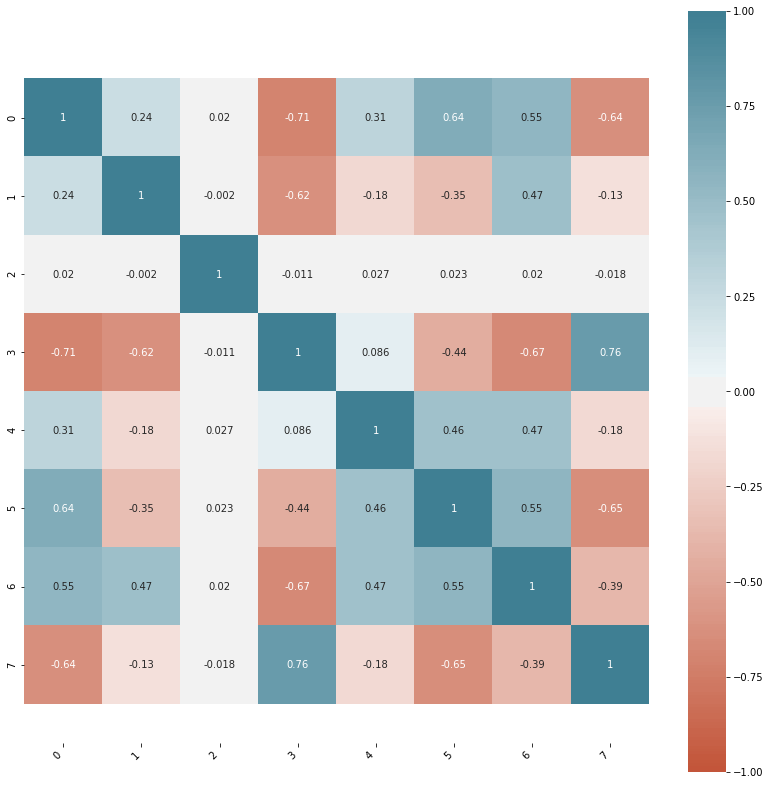

In [55]:
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [56]:
# Outlier detection with Z-Score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.53763097, 0.00566284,
        1.15220659],
       [1.21562472, 1.62265494, 0.52187207, ..., 0.03314851, 1.40338979,
        0.51777165],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.12249416, 0.48387509,
        0.35998293],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.50960652, 0.53475377,
        0.55105502],
       [0.08336999, 0.15830524, 0.83152777, ..., 1.11728642, 0.99626339,
        0.9651887 ],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.01941697, 1.24352619,
        1.01322073]])

In [59]:
len(np.where(z > 3)[0])

59

In [114]:
outliers = list(set(np.where(z > 3)[0]))
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

X_new = new_df.drop('index', axis = 1)

,index,0,1,2,3,4,5,6,7
0,0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770
...,...,...,...,...,...,...,...,...,...
9937,9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324
9938,9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303
9939,9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036
9940,9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019


In [115]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)

print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

cross_val_score(clf, X_train, y_train, cv=10)

Accuracy of train: 0.9637879005604254
Accuracy of test: 0.9654710023466309


array([0.9454023 , 0.95977011, 0.95689655, 0.96551724, 0.94827586,
       0.95977011, 0.9612069 , 0.96982759, 0.96408046, 0.95827338])

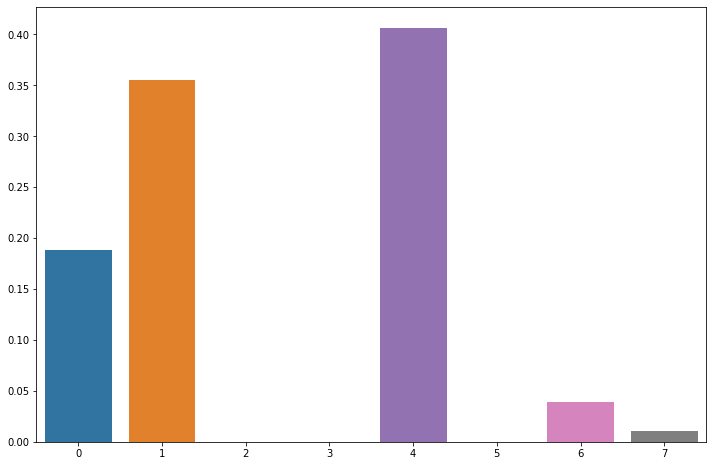

In [126]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=X_new.columns, y=importance)
plt.show()

In [129]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1527
           1       0.98      0.94      0.96      1456

    accuracy                           0.97      2983
   macro avg       0.97      0.96      0.97      2983
weighted avg       0.97      0.97      0.97      2983



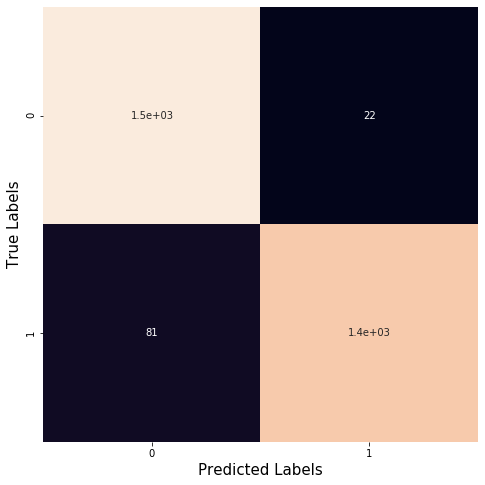

In [132]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [133]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9665900447816028
Recall = 0.9649803986125204
Accuracy = 0.9654710023466309
F1 Score = 0.9654052986531725


In [137]:
!pip install xgboost

In [138]:
import xgboost as xgb

In [139]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [161]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[20:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [162]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.9772928 , 0.01893623, 0.00377096],
       [0.99060273, 0.00659692, 0.00280041],
       [0.02355906, 0.97139984, 0.00504104],
       [0.00932647, 0.98677164, 0.00390188],
       [0.94966656, 0.04464243, 0.00569104],
       [0.01000511, 0.98594683, 0.00404804],
       [0.0435841 , 0.94636524, 0.01005066],
       [0.02593328, 0.96904224, 0.00502448],
       [0.00810007, 0.98903465, 0.00286527],
       [0.00932647, 0.98677164, 0.00390188]], dtype=float32)

In [163]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [164]:
best_preds

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [165]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9838733034116155
Recall = 0.983931629928683
Accuracy = 0.9839088166275561


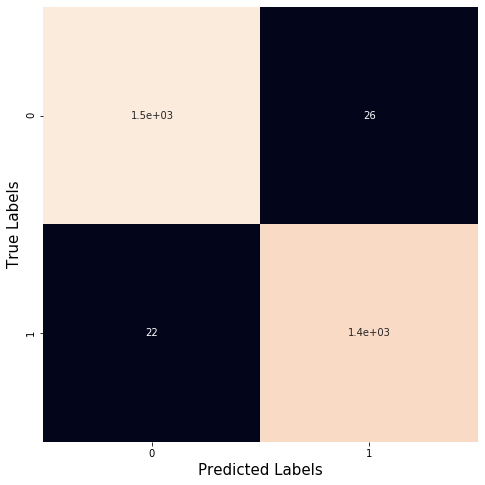

In [166]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
print("Xgboost is the best performing algorithm for it gives better scores")